<a href="https://colab.research.google.com/github/JeiGeek/ia1-LosPandas-prediccion_rendimiento_estudiantil/blob/main/01_exploratory_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# **Carga del dataset**

In [2]:
# Carga desde github
url = "https://raw.githubusercontent.com/JeiGeek/ia1-LosPandas-prediccion_rendimiento_estudiantil/main/Dataset/StudentPerformanceFactors.csv"
df = pd.read_csv(url)

In [3]:
# Información de las columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [5]:
#Hay nulos en el dataset
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [6]:
# Limpieza de nulos
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6378 non-null   int64 
 1   Attendance                  6378 non-null   int64 
 2   Parental_Involvement        6378 non-null   object
 3   Access_to_Resources         6378 non-null   object
 4   Extracurricular_Activities  6378 non-null   object
 5   Sleep_Hours                 6378 non-null   int64 
 6   Previous_Scores             6378 non-null   int64 
 7   Motivation_Level            6378 non-null   object
 8   Internet_Access             6378 non-null   object
 9   Tutoring_Sessions           6378 non-null   int64 
 10  Family_Income               6378 non-null   object
 11  Teacher_Quality             6378 non-null   object
 12  School_Type                 6378 non-null   object
 13  Peer_Influence              6378 non-null   object
 1

#**Exploratory Data Analysis**

## 1. Exploración de nuestra variable exam_score que es importante para saber el comportamiento de las nota y ver si se pueden predecir.

In [12]:
# Se conocen los distintos datos de exam_score
display(df['Exam_Score'].describe())

,Exam_Score
count,6378.000000
mean,67.252117
std,3.914217
min,55.000000
25%,65.000000
50%,67.000000
75%,69.000000
max,101.000000


> La media y la mediana muestran que son parecidas por ende indican que no se acumulan mucho en los extremos.

> Se tiene un outlier en el maximo siendo 101 porque en lo general las nota van de 0 a 100.

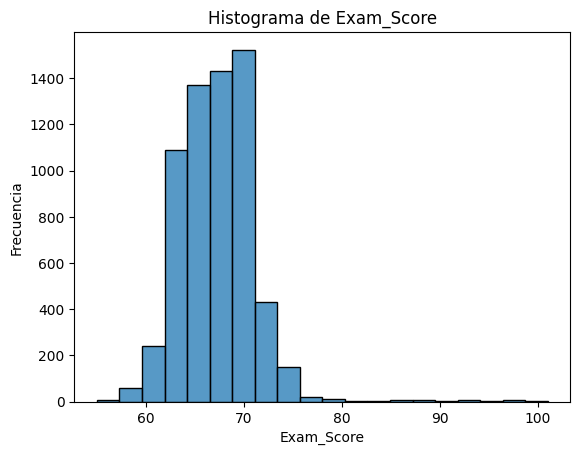

In [15]:
# Histograma de exam_score
sns.histplot(df['Exam_Score'], bins=20)
plt.title('Histograma de Exam_Score')
plt.xlabel('Exam_Score')
plt.ylabel('Frecuencia')
plt.show()

> Con el histograma se identifica que la mayoria de estudiantes aprueban con notas medias no altisimas ni bajisimas.

A partir de esto se pueden identificar que es posible predecir la nota de un estudiante debido a que on hay sesgos fuertes y detectar estudiantes que podrían perder.

## 2. Revisión de variables númericas

La intención de revisar las variables númericas es reconocer si existen valores imposibles

In [18]:
# Información básica de datos numericos

# select_dtypes - selecciona solo los datos de un tipo
# T - transpone la tabla para una mejor visualización
df.select_dtypes(include='number').describe().T

,count,mean,std,min,25%,50%,75%,max
Hours_Studied,6378.0,19.977109,5.985460,1.0,16.0,20.0,24.0,44.0
Attendance,6378.0,80.020853,11.550723,60.0,70.0,80.0,90.0,100.0
Sleep_Hours,6378.0,7.034964,1.468033,4.0,6.0,7.0,8.0,10.0
Previous_Scores,6378.0,75.066165,14.400389,50.0,63.0,75.0,88.0,100.0
Tutoring_Sessions,6378.0,1.495296,1.233984,0.0,1.0,1.0,2.0,8.0
Physical_Activity,6378.0,2.972719,1.028926,0.0,2.0,3.0,4.0,6.0
Exam_Score,6378.0,67.252117,3.914217,55.0,65.0,67.0,69.0,101.0


Se identificaron alguna variables fuertes es decir que pueden relacionarse bien con exam_score:

> **Previous_score** porque los estudiantes que ya venían con buenas notas, probablemente suelen mantenerlas.

> **Hours_Studied** porque puede ser que a más horas estudiadas, mejor desempeño.

> **Attendance** porque los que mas asisten deberían rendir mejor.

Ademas no se identifican valores numericos imposibles y ya con estos se obtuvieron los primeros supuestos.

## 3. Correlacion entre las variables y Exam_Score

Se reconoce si verdaderamente lo supuestos y otras variables se correlacionan con exam_score o por el contrario no.

In [21]:
# Se identifican las variables tipo string para darle una categoria numerica
df.select_dtypes(include='string')

""
0
1
2
3
4
...
6602
6603
6604
6605


In [10]:
# Visualizacion de algunos datos

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
5,19,88,Medium,Medium,Yes,8,89,Medium,Yes,3,Medium,Medium,Public,Positive,3,No,Postgraduate,Near,Male,71
6,29,84,Medium,Low,Yes,7,68,Low,Yes,1,Low,Medium,Private,Neutral,2,No,High School,Moderate,Male,67
7,25,78,Low,High,Yes,6,50,Medium,Yes,1,High,High,Public,Negative,2,No,High School,Far,Male,66
8,17,94,Medium,High,No,6,80,High,Yes,0,Medium,Low,Private,Neutral,1,No,College,Near,Male,69
9,23,98,Medium,Medium,Yes,8,71,Medium,Yes,0,High,High,Public,Positive,5,No,High School,Moderate,Male,72


In [8]:
#Notas y pruebas, esto despues lo borramos/editamos
notasfinales = df['Exam_Score']
notasfinales
#El dataset al parecer gira mas entorno a ver como se ven afectadas las notas de un examen final dadas ciertas circunstancias. Por lo tanto, podriamos hacer un columna que diga algo como "rendimiento en el examen" o algo asi tipo [Aprobado, Nota regular, Deficiente o desaprobado]
#Se supone que el "Exam_score" es lo que vamos a predecir, pero no se si tiene sentido predecir una nota, asi que podriamos darle un 'rendimiento' a cada rango de notas y que sea eso lo que vamos a predecir. Que dadas ciertos datos de un estudiante, definir que tan mal
#o que tan bien le irá a un examen. Esto lo uso guiandome del data set del "Estado del arte" donde lo que trata de predecir es si un estudiante "Se graduo, deserto o esta matriculado". Con otro ejemplo, usando de el Diabetes que casi todo el mundo lo hizo
#predicen si "Si tiene diabetes o no", tonces necesitamos una categoria para las notas. Todo esto que escribi lo podemos poner en la seccion de problemas que tuvimos con el dataset y lo de los nulos, que hubo algunos registros con nulos.

#Podemos graficar cuantos estudiantes "aprobaron o desaprobaron"
#Horas de sueño
#horas de estudio
#La matriz de relacion

,Exam_Score
0,67
1,61
2,74
3,71
4,70
...,...
6602,68
6603,69
6604,68
6605,68


In [9]:
#NOTA: Hasta donde tengo entendido, toca hacerle un procesamiento a los datos que son categoricos para pasarlos a un formato numerico.